# How to represent the brain's anatomy - as a volume

Not unlike the way that the satellite images of the the previous chapters were a "picture" of the world, a T1 image can be thought of as a "picture" of a brain in a similar fashion.  The specics of how the dimagnetic properties of water molecules are legeraged, along with the use of a superconducting magnet, to obtain these images are beyond the scope of this lesson book.  For now let us keep the analogy of the jpeg image in mind as we move into a consideration of the nifti itself.

Lets begin by loading it into memory and considering its data size.  Whereas previously we were working with .jpg and .png files, we will now be working with .nifti files, which are typically stored as .nii.gz, which corresponds to a compressed state.

In [4]:
#this code ensures that we can navigate the WiMSE repo across multiple systems
import subprocess
import os
#get top directory path of the current git repository, under the presumption that 
#the notebook was launched from within the repo directory
gitRepoPath=subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('ascii').strip()

#move to the top of the directory
os.chdir(gitRepoPath)

#set path to T1
t1Path=os.path.join(gitRepoPath,'exampleData','t1.nii.gz')
#obtain file information about the t1 file
T1fileinfo = os.stat(t1Path)

#print out some of the ifo
print('T1 size (in bytes)')
print(T1fileinfo.st_size)

T1 size (in bytes)
5688165


The T1 NIfTI image we just loaded is about 3.6 MB in size, which is roughly close to a high resolution digital image file.  Given what we know about digital image (every pixel has 3 to 4 *integer* values which correspond to its color characteristics), we can get a rough sense about the number data entries contained within a NIfTI, and--by extension--the general amount of "information" (a complex topic we won't go into here) that a NIfTI image contains about volume of space it is represents.

Quite helpfully, the NIfTI data type features a "header" which contains a great deal of [metadata](https://en.wikipedia.org/wiki/Metadata) about the associated image data.  Think of it as being analagous to the [Exif](https://en.wikipedia.org/wiki/Exif) data of a typical digital image.

In [5]:
#begin process of loading file as a T1 nifti using nibabel
import nibabel as nib
#import the data
img = nib.load(t1Path)

#extract the header info
T1header = img.header
#print the output
print(T1header)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 182 218 182   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   1.   1.   1.   1.8  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-1.  0.  0. 90.]

That's a lot of information!

For now, we'll only briefly consider a few of these features, but we'll to each of these as we necessary as we proceed through the next set of lessons.

[**dim**](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/dim.html/document_view):  This field displays the dimensions of the NIfTI image data object.  The first number (3, in this case) indicates the total number of dimensions occupied by the data.  The next several values (as many as indicated by the first number in this vector) correspond to the span of each of those dimensions.  Thus, in this case the first dimension spans 145 entries, the second spans 174 entires, and the third spans 145 entries.  

[**datatype**](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/datatype.html):  This field corresponds to the [*type* of numerical data](https://en.wikipedia.org/wiki/Computer_number_format)  contained within each of the nifti image data object's entries.  Here we see that it is "float32".  This gives us two primary peices of information: (1) we now know that the numerical entries are *not* integers or whole numbers (and thus they can adopt values *between* 1,2,3, etc.)  and (2) we now know that each of these entries [takes up about 4 bytes](https://en.wikipedia.org/wiki/Single-precision_floating-point_format).  

[**pixdim**](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/pixdim.html/document_view):  Ignoring the initial (-1) and last four values in this field (1.8 0. 0. 0.), we see the numbers 1. 1. 1..   These indicate the size of the dimensions of real world space reprsented by the NIfTI image data object's entries.  In the case of the map from the previous chapter, this would have corresponded roughly to hundreds of square miles (though the exact quantity would be complex issue given that the pixels dont correspond the same surface area size).  In this case, we see that each of these values is 1 millimeter, which means that the data in any entry of the NIfTI represents a 1 by 1 by 1 for a total of 1 cubic millimeter volume of space.  The fifth value (1) isn't particularly relevant to this particular nifti, as our nifti data object is only 3 dimensional.  If we were examining fMRI data, this value would indicate the timestep used for the data. 

Also, its important to note that all three of the spatial dimension measures examined above are the same.  This need not be the case, and it could be that our voxels are actually representing units of space whose sides are not all equal.  In this case though, we can say that the voxels are "isometric", meaning that all faces are the same size.


[**qform_code**](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/qsform.html):  This field specifies the orientation schema that will be detailed in subsequent fields.  In the previous lesson we considered the intersection of the [prime maridian](https://en.wikipedia.org/wiki/IERS_Reference_Meridian) and [equator](https://en.wikipedia.org/wiki/Equator) as the "origin" of the major orientation schema we used, and endeavored to overlay these locations when we aligned global satellite images.  But imagine that we instead used some other coordinate system to establish a different origin point.  Alternatively, what if we stopped using degrees as our unit of measure or that we flipped our labeling convention for east and west? In any of these cases, we would need to find a way to indicate what our refrence frame was.  This need for specification of orientation system is reflected in the **qform_code** of the NIfTI header.  Here, we have some indicator ("mni" or "talarach", for example) that establish a common refrence frame for orienting the image data.  "mni" and "talarach" respectively correspond to the standard Montreal Neurological Institute [citation] and Talairach [citation] atlases.  These and other neuroimaging reference frames are well described [elsewhere](http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/).

[**qoffset_x, qoffset_y , qoffset_z**](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/qsform.html) (see "METHOD 2"):  These numbers are the transforms necessary to align this image to the reference specified in "qform_code".  Referring back to our previous lessons, you can think of these numbers as the shift needed to align the political map with the geographic map. Now though, we have three dimensions (as opposed to two) and need to align each of them.  Typically our goals when aligning MRI images  are threefold:  (1) that the images share matching scales, (2) that the images exhibit the same orientation (e.g. top -> top, left -> left, etc.), and (3) that the images points share the same "origin".         

We have now looked at some important features of the [NIfTI header](https://nifti.nimh.nih.gov/pub/dist/src/niftilib/nifti1.h).  However, we haven't yet taken a look the actual data component of a NIfTI, as we did with digital images in previous lessons.  Lets move forward at take a look at this now.

In [6]:
print('Data dimensions')
print('(How many data entries are spanned across each dimension)')
#extract data dimensions and store in DataDimensions variable
dataDimensions=img.shape
print(dataDimensions)

Data dimensions
(How many data entries are spanned across each dimension)
(182, 218, 182)


Here we are no longer indexing into the header, but we nontheless see that the size of the image data is (182,218,182), which is consistent with the information we obtained from the "dim" field of the header.  In theory, the metadata contained should always be consistent with the actual data, but it is possible for these to become inconsistent due to improper file generation or manipulation.

It's also worth noting that the [nibabel](https://nipy.org/nibabel/) offers a number of methods for extracting *specific* information from the header.  For example, we can extract the information specific to the spatial dimensions of the image we are looking at.  This capability can be helpful when performing series of computations or developing your own sets of functions.

In [7]:
print('Voxel dimensions for T1 (in mm)')
#extract dimensions and store in voxelDims variable
voxelDims=img.header.get_zooms()
print(voxelDims)

Voxel dimensions for T1 (in mm)
(1.0, 1.0, 1.0)


Here, we obtain a result that matches what we saw by looking at the entire header.  Now though we have stored this specific information in a variable.  Now, by taking the size of an individual voxel and the dimensions of the entire data block we can compute the amount of space that this nifti represents. 

In [8]:
print('How much total space does this representation correspond to?')
print('')
print(f'{dataDimensions[0]*voxelDims[0]} mm by {dataDimensions[1]*voxelDims[1]} mm by {dataDimensions[2]*voxelDims[2]} mm' )

How much total space does this representation correspond to?

182.0 mm by 218.0 mm by 182.0 mm


For those more comfortable with imperial measurements, this corresponds to a volume of space that is slightly more than half a foot wide (\~.6 feet), almost three quarters of a foot tall (\~.71 feet), and slightly more than half a foot deep (\~.6 feet).  This information gives us a sense of the gross scale of the data contained within a NIfTI.  But what about the data contained within a specific entry?  Whats in a voxel?

Lets actually index into a specific voxel and see what information is stored there.  From the header, we know that it will be a float value, but we dont, as of yet, have a ballpark sense of what this value will be.  We'll just arbitrarily pick a value.

In [9]:
#extract the actual data into the variable data
data = img.get_fdata()
#arbitrarily index into the item the 96 X, 86 Y, 57 Z location and read it out
data[96,86,57]

235.0

235.0.  We don't really know what this number means, whether it is a lot or a little, or if it is un usual, but it at least gives us some sense of the kind of numbers this NIfTI object contains.  What about all of the others though?  How can we get a comprehensive and informative sense of those?  Lets take a hint from our digital image lessons and explore this NIfTI data by plotting a histogram of the data values for each voxel.  In a certian sense, we're lucky (relative to the digital image case) because we can plot a sensible histogram for this information, as there aren't 3 distinct color channels to worry about (which would make it difficult to interpret a histogram or set of histograms).  Additionally, we can get a sense of what how many total voxels there are, how many are "non-zero" (in that they contain a measure distinct from zero), and what proportion of the total number of voxels this corresponds to. Lets do that now.

Total number of voxels
7221032

Minimum voxel value
-37.0

Maximum voxel value
789.0

Number of voxel values less than or equal to zero
2203910

Number of voxel values greater than zero
5017122

Proportion of entries greater than zero (i.e. containing data)
0.6947929326445306



Text(0.5, 1.0, 'Distributon of voxel values greater than zero')

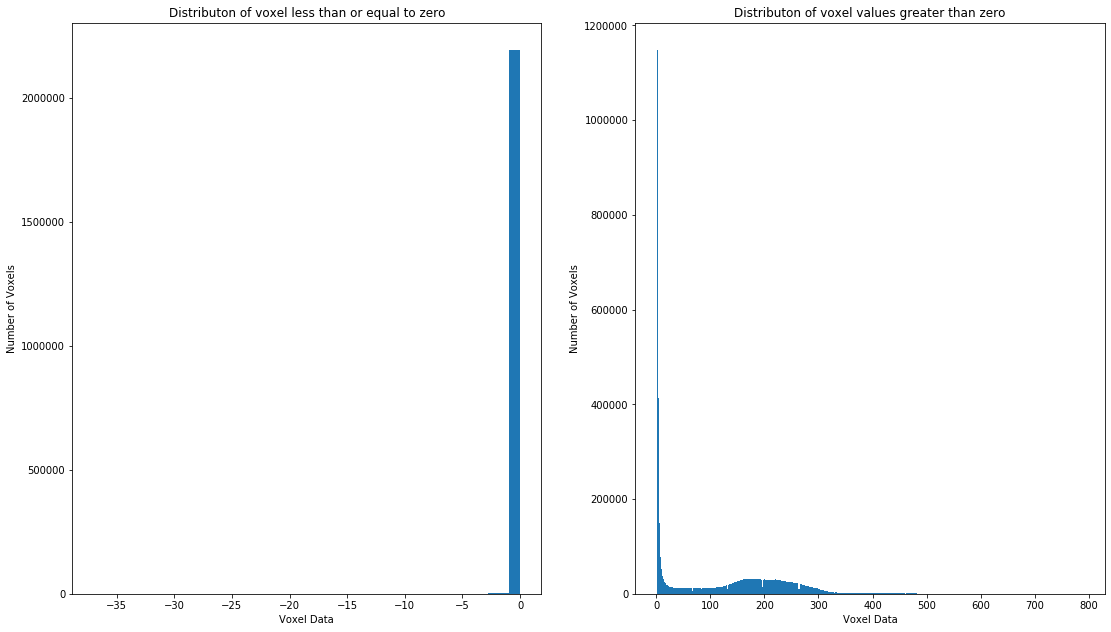

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#necessary for plotting
%matplotlib inline
#transform data array for use
unwrappedData=np.ndarray.flatten(data)

print('Total number of voxels')
#compute total number of voxels via straightforward multiplication
voxTotal=dataDimensions[0]*dataDimensions[1]*dataDimensions[2]
print(voxTotal)
print('')

print('Minimum voxel value')
print(np.min(unwrappedData))
print('')

print('Maximum voxel value')
print(np.max(unwrappedData))
print('')

#set value at which to split the data
#Operating under the assumption that negative values are not viable
splitPoint=0

#define two functions for obtaining boolean vectors for numerical comparison
def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

#apply the function to the unwrapped data
result=map(smallVal,unwrappedData)
#convert the output to a usable format 
smallBool=list(result)

#apply the function to the unwrapped data
result=map(largeVal,unwrappedData)
#convert the output to a usable format 
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))
print('')

print('Number of voxel values greater than zero')
print(sum(largeBool))
print('')

print('Proportion of entries greater than zero (i.e. containing data)')
print(sum(largeBool)/voxTotal)
print('')

#perform plotting of zero/negative values
plt.subplot(1, 2, 1)
plt.hist(unwrappedData[smallBool], bins=40)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel less than or equal to zero')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

#perform plotting of positive values
plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], bins=400)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel values greater than zero')

It seems that about a quarter of the voxels contain data that we would consider to be reprsentatve of the brain, with the assumption that "empty" voxels correspond to background and/or uninformative voxels.  Depending on whether or not this T1 has had the brain "extracted" (i.e. the brain isolated from the rest of the head, neck, and body, via a masking process), this proporation may also include non-brain tissues.  Indeed, given that we took a look at this very same T1 image in the previous lesson, we know that this is the case an that the brian has been isolated from non brain tissues.  Furthermore, note how we had to split the histogram in two.  Had we not done this, the number of empty voxels would have overwhelmed the visualization and we wouldn't have been able to observe the distribution visible in the plot on the right due to the extreme number of values right below 0.

Now that we have a sense of the numerical variability of the data in this nifti, lets get a sense of how these values are laid out spatially.  Keep in mind that, just like a digital image wherein the i,j entry of the data array represents a portion of space that spatially adjacent to the i,j-1 (or i,j+1, or i+1,j etc.), the i,j,k entry of a NIfTI is spatially adjacent to the i,j,k+1 entry.  We can get a better sense of this by interacting with the NIfTI using a [niwidget](https://nipy.org/niwidgets/).

In [11]:
from niwidgets import NiftiWidget

t1Widget = NiftiWidget(t1Path)

t1Widget.nifti_plotter(colormap='gray')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=90, continuous_update=False, description='x', max=181), IntSlider(value=…

Take a moment to shift through the NIfTI image plotted above.  If you want a more standard visualization, feel free to switch the colormap to gray.  **As a challenge, try and shift the x, y, and z sliders to cross at the posterior commisure, and take note of the coordinates of this point**.  Take note that the left, posterior, inferior corner is the 0 coordinate.  The coordinate shift that results in the posterior commisure being at (0,0,0) occurs after the previously qoffset information has been applied.  After this transform has been applied, locations in the left hemisphere are characterized by coorinates that have a negative first value (x coordinate).

As an alternative to trying to find the posterior commisure manually, we can also use the information in the header (assuming its accurate) to compute its location in this image data.

In [12]:
print('T1 voxel resolution (in mm)')
print(img.header.get_zooms())
print('')

print('T1 voxel affine')
imgAff=img.affine
print(img.affine)
print('')

print('Coordinates of posterior commisure')
#force absolute value in order to perform the math correctly
imgSpatialTrans=np.abs([imgAff[0,3]/imgAff[0,0],imgAff[1,3]/imgAff[1,1],imgAff[2,3]/imgAff[2,2]])
print(imgSpatialTrans)
print('')

T1 voxel resolution (in mm)
(1.0, 1.0, 1.0)

T1 voxel affine
[[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]

Coordinates of posterior commisure
[ 90. 126.  72.]



If you move the slider coordinates to the value specified under "Coordinates of posterior commisure", your crosshair should directly target the posterior commisure.  However, there sign of the numbers in this affine matrix suggest that something may be afoot.  Lets consider in a bit more detail what these numbers might be indicating.

Admittedly, the notion of a shift or transform gets a bit more complicated in three dimensions, where it is possible to have your data rotated or flipped along multiple dimensions.  With a standard 2d image this would have been quite obvious upon inspection--you would notice if the world had been rotated 90% or flipped such that Russia was west of the US's "east" coast!  Although some of these changes are obvious in a NIfTI image (for example a 90 degree rotation), some are less obvious.  For example, as it turns out, **this brain data is flipped in its x axis!**. Because of this the right hemisphere data is stored in indexes smaller than the X coordinate of the posterior commissure (90) while the left hemisphere data is stored in indexes that are larger than the X coordinate of the posterior commissure.  This is contrary to standard orientation schemas.  Lets take a look at how we could come to know this by taking a look at the [affine transform matrix].(https://en.wikipedia.org/wiki/Affine_transformation) again.

In [13]:
print('T1 voxel affine')
imgAff=img.affine
print(img.affine)
print('')

T1 voxel affine
[[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]



You'll notice that the upper left hand value (-1.), which specifies the voxel resolution of the Y dimension, is negative.  This is as opposed to the values found for the Y and Z dimension resolutions, which are postitive.  Considered in conjunction with the information in the first three rows for the rightmost column (the **qoffset_** information from the header), this indicates that a flip in the X dimension is present.  This is why the *np.abs* function was used earlier when computing the posterior commisure location (NOTE: this strategy will not work for all affine flip cases, but did work in this case).  For more detailed examinations and considerations of affine transforms for neuroimaging data [links]

Now that we have developed a good sense of the information stored in a T1 NIfTI image, lets follow in the footsteps of our lessons looking at two dimensional digital images, and see how a **parcellation** can be implemented using three dimensional NIfTI data.